Problem Statement : Urban areas face challenges with waste management, often leading to overflowing trash bins and litter in public spaces. Waste Watcher leverages existing CCTV infrastructure and AI-driven object detection to monitor waste levels in real-time, sending alerts to authorities for timely intervention and cleanup, helping to maintain cleanliness and improve public health.

In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 366MB/s]


dataset link : https://universe.roboflow.com/garbage-detection-l3cum/garbage-detection-using-cctv

In [ ]:
# dataset
from roboflow import Roboflow

rf = Roboflow(api_key="5keK78Jd2vJ9EB7lacGU")
project = rf.workspace("garbage-detection-l3cum").project("garbage-detection-using-cctv")
version = project.version(9)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Garbage-Detection-using-CCTV-9 in yolov8:: 100%|██████████| 7731/7731 [00:01<00:00, 4078.51it/s]


In [ ]:
model.train(
    data="/content/Garbage-Detection-using-CCTV-9/data.yaml",
    epochs=10,
    batch=8,
    imgsz=640
)

Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Garbage-Detection-using-CCTV-9/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 85.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 328MB/s]


AMP: checks passed ✅


train: Scanning /content/Garbage-Detection-using-CCTV-9/train/labels... 3082 images, 41 backgrounds, 0 corrupt: 100%|██████████| 3082/3082 [00:01<00:00, 1961.97it/s]

train: WARNING ⚠️ /content/Garbage-Detection-using-CCTV-9/train/images/img1778_jpg.rf.d9b82cf8f5b1bf163ba6a6689101b769.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Garbage-Detection-using-CCTV-9/train/images/img2757_jpg.rf.f57ab296e902f83272940ac4152384ae.jpg: 1 duplicate labels removed
train: New cache created: /content/Garbage-Detection-using-CCTV-9/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 34, len(boxes) = 8749. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Garbage-Detection-using-CCTV-9/valid/labels... 779 images, 7 backgrounds, 0 corrupt: 100%|██████████| 779/779 [00:00<00:00, 912.19it/s]

val: New cache created: /content/Garbage-Detection-using-CCTV-9/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7, len(boxes) = 2191. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.19G      2.112      2.922      2.171         14        640: 100%|██████████| 386/386 [01:05<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.96it/s]


                   all        779       2191      0.169      0.218      0.117     0.0446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.44G      2.204      2.768      2.305          7        640: 100%|██████████| 386/386 [01:01<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.45it/s]


                   all        779       2191       0.23      0.164      0.121     0.0481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.46G      2.208      2.681      2.324          8        640: 100%|██████████| 386/386 [01:01<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.62it/s]


                   all        779       2191       0.28      0.182      0.151     0.0627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.48G      2.149      2.616      2.262          2        640: 100%|██████████| 386/386 [01:01<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.34it/s]


                   all        779       2191      0.296      0.254      0.198     0.0791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.48G      2.085       2.55      2.228          5        640: 100%|██████████| 386/386 [01:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.18it/s]


                   all        779       2191      0.337      0.259      0.216     0.0918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.51G      2.055      2.477      2.202         10        640: 100%|██████████| 386/386 [01:01<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.53it/s]


                   all        779       2191      0.369      0.259      0.222     0.0948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.53G      1.989      2.404      2.137          8        640: 100%|██████████| 386/386 [01:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.76it/s]


                   all        779       2191      0.396      0.288      0.257      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.54G      1.952      2.368      2.108          3        640: 100%|██████████| 386/386 [01:01<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.53it/s]


                   all        779       2191      0.407      0.296      0.274      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.55G      1.902      2.283      2.068          2        640: 100%|██████████| 386/386 [01:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.58it/s]


                   all        779       2191      0.404      0.289      0.272      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.58G       1.89      2.256       2.05         10        640: 100%|██████████| 386/386 [01:01<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:06<00:00,  7.30it/s]


                   all        779       2191      0.429      0.309      0.304      0.135

10 epochs completed in 0.194 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:09<00:00,  5.38it/s]


                   all        779       2191      0.432      0.308      0.304      0.135
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797462f75a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/garbage.jpg: 384x640 1 garbage, 38.0ms
Speed: 1.9ms preprocess, 38.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
      name  class  confidence  \
0  garbage      0     0.25623   

                                                 box  
0  {'x1': 112.09006, 'y1': 33.97287, 'x2': 269.78...  


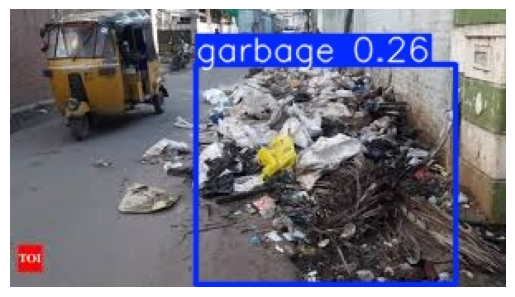

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO

model_path = '/content/runs/detect/train4/weights/best.pt'
img_path = '/content/garbage.jpg'

model = YOLO(model_path)
results = model(img_path)

if results:
    detections = results[0].to_df()
    print(detections)

    output_path = "/content/predicted_output.jpg"
    results[0].save(output_path)
    img = mpimg.imread(output_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("No detections found.")
